## Now we define the basic model and load the orientation and lithological information
mj: We inset the model dimensions as once reprojects the edge pixels of the topography are undefined. Probably doesn't need to be that extreme (unit is metres). Could use parameter <b>maxtopo</b> to 

## Preprocess data to ensure it meets gempy's requirements

In [1]:
import pandas as pd

mname='hams3' 

contacts=pd.read_csv('../test_data3/output/'+mname+'_contacts4.csv',",")
orientations=pd.read_csv('../test_data3/output/'+mname+'_orientations.csv',",")
invented_orientations=pd.read_csv('../test_data3/output/'+mname+'_empty_series_orientations.csv',",")
interpolated_orientations=pd.read_csv('../test_data3/tmp/combo_full.csv',",")
intrusive_orientations=pd.read_csv('../test_data3/output/ign_orientations_saucers.csv',",")
intrusive_contacts=pd.read_csv('../test_data3/output/ign_contacts.csv',",")
fault_contact=pd.read_csv('../test_data3/output/hams3_faults.csv',",")
fault_orientations=pd.read_csv('../test_data3/output/hams3_fault_orientations.csv',",")
all_sorts=pd.read_csv('../test_data3/tmp/hams3_all_sorts2.csv',",")

all_orientations=pd.concat([orientations,invented_orientations,intrusive_orientations])
all_orientations.reset_index(inplace=True)

all_sorts.set_index('code',  inplace = True)

all_contacts=pd.concat([intrusive_contacts,contacts])
all_contacts.reset_index(inplace=True)
#display(all_contacts)
all_groups=set(all_sorts['group'])
#print(all_groups)
#display(all_contacts.formation.unique())
unique_contacts=set(all_contacts['formation'])

# Remove groups that don't have any contact info
no_contacts=[]
groups=[]
for agroup in all_groups:
    found=False
    #print('GROUP',agroup)
    for acontact in all_contacts.iterrows():
        if(all_sorts.loc[acontact[1]['formation']]['group'] in agroup):
            found=True
            break
    if(not found):
        no_contacts.append(agroup)
        print('no contacts for the group:',agroup)
    else:
        groups.append(agroup)

# Update list of all groups that have formations info

f=open('../test_data3/tmp/hams3_groups2.csv',"r")
contents =f.readlines()
f.close

ngroups=contents[0].split(" ")
ngroups=int(ngroups[1])       
no_contacts=[]
groups=[]

for i in range(1,ngroups+1):
    found=False
    #print('GROUP',agroup)
    for acontact in all_contacts.iterrows():
        if(all_sorts.loc[acontact[1]['formation']]['group'] in contents[i]):
            found=True
            break
    if(not found):
        no_contacts.append(contents[i].replace("\n",""))
        print('no contacts for the group:',contents[i].replace("\n",""))
    else:
        groups.append(contents[i].replace("\n",""))

# Make new list of groups

fgp=open('../test_data3/tmp/hams3_groups_clean.csv',"w")
fgp.write('1 '+str(len(groups))+'\n')
for i in range(0,len(groups)):
    fgp.write(contents[i+1].replace("\n","")+'\n')
fgp.close()        

# Remove orientations with no equivalent formations info

for agroup in all_groups:
    found=False
    #print('GROUP',agroup)
    for ano in all_orientations.iterrows():
        if(all_sorts.loc[ano[1]['formation']]['group'] in agroup):
            found=True
            break
    if(not found):
        no_contacts.append(agroup)
        print('no orientations for the group:',agroup)

print(no_contacts)

# Update master list of  groups and formations info

fas=open('../test_data3/tmp/hams3_all_sorts_clean.csv',"w")
fas.write('index,group number,index in group,number in group,code,group\n')
for a_sort in all_sorts.iterrows():
    #print(a_sort[0])
    if(a_sort[1]['group'] not in no_contacts):
        ostr=str(a_sort[1]['index'])+","+str(a_sort[1]['group number'])+","+str(a_sort[1]['index in group'])+","+str(a_sort[1]['number in group'])+","+a_sort[0]+","+a_sort[1]['group']+"\n"
        fas.write(ostr)
fas.close()

# Update orientation info

fao=open('../test_data3/output/'+mname+'_orientations_clean.csv',"w")
fao.write('X,Y,Z,azimuth,dip,polarity,formation\n')

for ano in all_orientations.iterrows():
    #if any(grp in all_sorts.loc[ano[1]['formation']]['group'] for grp in no_contacts):
    if(all_sorts.loc[ano[1]['formation']]['group'] in no_contacts or not ano[1]['formation'] in unique_contacts):  #fix here################################
        print('dud orientation:',ano[1]['formation'])
    else:
        ostr=str(ano[1]['X'])+","+str(ano[1]['Y'])+","+str(ano[1]['Z'])+","+\
             str(ano[1]['azimuth'])+","+str(ano[1]['dip'])+","+str(ano[1]['polarity'])+","+ano[1]['formation']+"\n"
        fao.write(ostr)

fao.close()

# Update formation info

fac=open('../test_data3/output/'+mname+'_contacts_clean.csv',"w")
fac.write('X,Y,Z,formation\n')

for acontact in all_contacts.iterrows():
    if(all_sorts.loc[acontact[1]['formation']]['group'] in no_contacts):
        print('dud contact:',acontact[1]['formation'])
    else:
        ostr=str(acontact[1]['X'])+","+str(acontact[1]['Y'])+","+str(acontact[1]['Z'])+","+acontact[1]['formation']+"\n"
        fac.write(ostr)

fac.close()


no contacts for the group: A_s_PMI
no contacts for the group: A_mgn_PRK
no contacts for the group: A_b_PRK
no contacts for the group: A_s_PRK
no contacts for the group: A_mgn_PMI
no contacts for the group: A_s_PMI
no contacts for the group: A_mgn_PRK
no contacts for the group: A_b_PRK
no contacts for the group: A_s_PRK
no contacts for the group: A_mgn_PMI
no orientations for the group: A_mgn_PRK
no orientations for the group: A_mgn_PMI
['A_s_PMI', 'A_mgn_PRK', 'A_b_PRK', 'A_s_PRK', 'A_mgn_PMI', 'A_mgn_PRK', 'A_mgn_PMI']
dud orientation: P__WYd_kd
dud orientation: P__WYd_kd
dud orientation: A_s_PRK
dud orientation: A_s_PRK
dud orientation: A_s_PRK
dud orientation: A_s_PRK
dud orientation: A_s_PRK
dud orientation: A_b_PRK
dud orientation: A_s_PMI
dud orientation: A_s_PMI
dud orientation: A_s_PMI
dud orientation: A_s_PMI
dud orientation: A_s_PRK
dud orientation: A_s_PRK


In [2]:
import sys, os
sys.path.append("../../../../gempy")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os
geo_model = gp.create_model('gp_test')
minx=500057    #left hams
maxx=603028    #right
miny=7455348   #bottom
maxy=7567953   #top
base=-3000
top=1200

#print(extents)
#gp.init_data(geo_model, extent=[502536, 600652, 7.458e6, 7.56e6, -3000, 1200],
gp.init_data(geo_model, extent=[minx, maxx, miny, maxy, base, top],
    resolution = (50,50,50), 
      path_o = '../test_data3/output/hams3_orientations_clean.csv',
      path_i = '../test_data3/output/hams3_contacts_clean.csv', default_values=True); #%%      
#      path_o = '../test_data3/output/hams3_all_orientations5.csv',
#      path_i = '../test_data3/output/hams3_contacts4.csv', default_values=True); #%%

Active grids: ['regular']


## Show example lithological points

In [3]:
gp.get_data(geo_model, 'surface_points')['surface'].value_counts()


P__HAb_cib       115
A_HAm_cib         73
A_HAu_xsl_ci      66
A_FOj_xs_b        61
A_HAd_kd          51
P__HAw_fr         40
A_mgn_PRK_32      37
A_FOh_xs_f        31
P__HAo_ci         30
A_FOu_bbo         29
P__HAj_xci_od     29
P__TK_s           19
P__TKo_stq        18
P__SKq_stq        14
A_FOo_bbo         14
A_FOp_bs          14
P__WYm_sp         12
A_FOr_b           12
A_mgn_PMI_520      7
P__SKb_bb          5
P__TKa_xs_k        5
P__WYa_s           2
P__TKk_sf          2
basement           0
Name: surface, dtype: int64

## Show example orientations

In [4]:
gp.get_data(geo_model, 'orientations')['surface'].value_counts()

A_mgn_PRK_32     37
A_FOj_xs_b       30
A_FOh_xs_f       22
P__HAb_cib       18
A_HAm_cib        17
A_FOp_bs         13
A_FOu_bbo        12
A_HAu_xsl_ci      9
P__HAo_ci         7
A_mgn_PMI_520     7
P__SKq_stq        5
P__TKk_sf         5
P__HAj_xci_od     4
P__WYa_s          3
A_HAd_kd          3
A_FOo_bbo         3
P__TK_s           2
P__SKb_bb         1
P__WYm_sp         1
A_FOr_b           1
P__HAw_fr         0
P__TKo_stq        0
P__TKa_xs_k       0
basement          0
Name: surface, dtype: int64

## Plot some of this data

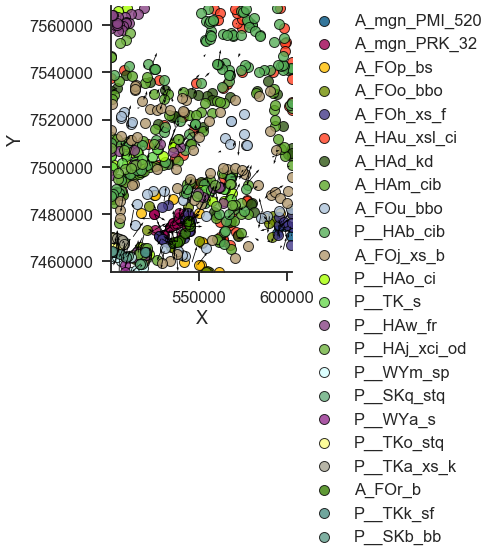

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='z');

## Load reprojected topgraphy to model

C:\Users\00073294\Dropbox\1_Jupyter_notebooks\map2loop\notebooks
Cropped raster to geo_model.grid.extent.
[ 500057  603028 7455348 7567953] [126 116]
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 5.01086710e+05,  7.45647405e+06, -2.95800000e+03],
       [ 5.01086710e+05,  7.45647405e+06, -2.87400000e+03],
       [ 5.01086710e+05,  7.45647405e+06, -2.79000000e+03],
       ...,
       [ 6.00808797e+05,  7.56750615e+06,  0.00000000e+00],
       [ 6.01696478e+05,  7.56750615e+06,  0.00000000e+00],
       [ 6.02584159e+05,  7.56750615e+06,  0.00000000e+00]])

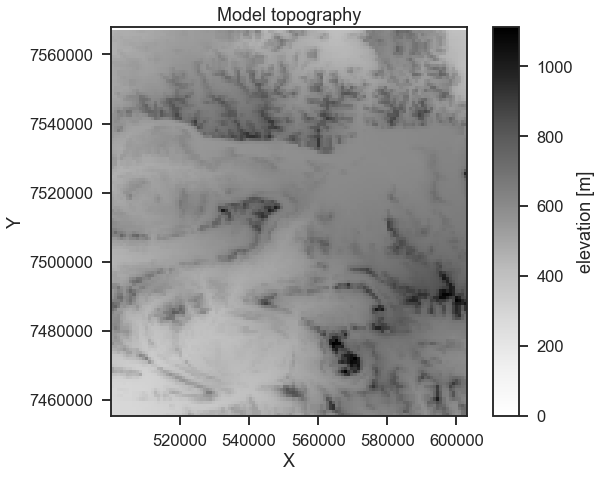

In [6]:
print(os.getcwd())
fp = '../test_data3/dtm/hams3_dtm_rp.tif'
geo_model.set_topography(source='gdal',filepath=fp)



In [28]:
contents=pd.read_csv('../test_data3/tmp/hams3_groups_clean.csv')

display(contents,len(contents))
#gp.get_data(geo_model, 'surface_points')['surface']

,1 7
0,A_mgn_PMI_520
1,A_mgn_PRK_32
2,Wyloo_Group
3,Shingle_Creek_Group
4,Turee_Creek_Group
5,Hamersley_Group
6,Fortescue_Group


7

In [37]:
f=open('../test_data3/tmp/hams3_groups_clean.csv',"r")
contents =f.readlines()
f.close

ngroups=contents[0].split(" ")
ngroups=int(ngroups[1])
print(ngroups)
groups=[]
for i in range(1,ngroups+1):
    groups.append(contents[i].replace("\n",""))
display(groups)


7


['A_mgn_PMI_520',
 'A_mgn_PRK_32',
 'Wyloo_Group',
 'Shingle_Creek_Group',
 'Turee_Creek_Group',
 'Hamersley_Group',
 'Fortescue_Group']

## Load surfaces and assign to series

In [38]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,A_mgn_PMI_520,Default series,1,False,#015482,1
1,A_mgn_PRK_32,Default series,2,False,#9f0052,2
2,A_FOp_bs,Default series,3,False,#ffbe00,3
3,A_FOo_bbo,Default series,4,False,#728f02,4
4,A_FOh_xs_f,Default series,5,False,#443988,5
5,A_HAu_xsl_ci,Default series,6,False,#ff3f20,6
6,A_HAd_kd,Default series,7,False,#325916,7
7,A_HAm_cib,Default series,8,False,#5DA629,8
8,A_FOu_bbo,Default series,9,False,#acc2d9,9
9,P__HAb_cib,Default series,10,False,#56ae57,10


In [39]:
geo_model.series

,order_series,BottomRelation
Default series,1,Erosion
Basement,2,Erosion


In [40]:
print(ngroups)
series_dict = {}
formations_list = []
for i in range(0,ngroups):
    f=open('../test_data3/tmp/'+groups[i]+'.csv',"r")
    #print('group:',groups[i])
    contents =f.readlines()
    nformations=str(contents[0])
    nformations=nformations.split(" ")
    nformations=int(nformations[1].replace("\n",""))
    
    for j in range(1,nformations+1):
        if(any(x in contents[j].replace("\n","") for x in gp.get_data(geo_model, 'surface_points')['surface'])):
            #print(contents[j].replace("\n",""))
            formations_list.append(contents[j].replace("\n","").replace("-","_"))
    
    series_dict[groups[i]] = formations_list
    formations_list = []
    f.close
series_dict

7


{'A_mgn_PMI_520': ['A_mgn_PMI_520'],
 'A_mgn_PRK_32': ['A_mgn_PRK_32'],
 'Wyloo_Group': ['P__WYm_sp', 'P__WYa_s'],
 'Shingle_Creek_Group': ['P__SKb_bb', 'P__SKq_stq'],
 'Turee_Creek_Group': ['P__TKo_stq', 'P__TKa_xs_k', 'P__TKk_sf', 'P__TK_s'],
 'Hamersley_Group': ['P__HAo_ci',
  'P__HAw_fr',
  'P__HAj_xci_od',
  'P__HAb_cib',
  'A_HAu_xsl_ci',
  'A_HAd_kd',
  'A_HAm_cib'],
 'Fortescue_Group': ['A_FOj_xs_b',
  'A_FOu_bbo',
  'A_FOp_bs',
  'A_FOo_bbo',
  'A_FOh_xs_f',
  'A_FOr_b']}

In [41]:
gp.map_series_to_surfaces(geo_model, series_dict,
    set_series=True, remove_unused_series=True)

,surface,series,order_surfaces,isBasement,color,id
0,A_mgn_PMI_520,A_mgn_PMI_520,1,False,#015482,1
1,A_mgn_PRK_32,A_mgn_PRK_32,1,False,#9f0052,2
15,P__WYm_sp,Wyloo_Group,1,False,#d4ffff,3
17,P__WYa_s,Wyloo_Group,2,False,#952e8f,4
16,P__SKq_stq,Shingle_Creek_Group,1,False,#65ab7c,5
22,P__SKb_bb,Shingle_Creek_Group,2,False,#5e9b8a,6
12,P__TK_s,Turee_Creek_Group,1,False,#69d84f,7
18,P__TKo_stq,Turee_Creek_Group,2,False,#fcfc81,8
19,P__TKa_xs_k,Turee_Creek_Group,3,False,#a5a391,9
21,P__TKk_sf,Turee_Creek_Group,4,False,#4c9085,10


In [42]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,A_mgn_PMI_520,A_mgn_PMI_520,1,False,#015482,1
1,A_mgn_PRK_32,A_mgn_PRK_32,1,False,#9f0052,2
15,P__WYm_sp,Wyloo_Group,1,False,#d4ffff,3
17,P__WYa_s,Wyloo_Group,2,False,#952e8f,4
16,P__SKq_stq,Shingle_Creek_Group,1,False,#65ab7c,5
22,P__SKb_bb,Shingle_Creek_Group,2,False,#5e9b8a,6
12,P__TK_s,Turee_Creek_Group,1,False,#69d84f,7
18,P__TKo_stq,Turee_Creek_Group,2,False,#fcfc81,8
19,P__TKa_xs_k,Turee_Creek_Group,3,False,#a5a391,9
21,P__TKk_sf,Turee_Creek_Group,4,False,#4c9085,10


In [43]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,595340.779975,7.475217e+06,671,0.695988,0.338964,0.500026,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
1,598761.529585,7.475077e+06,689,0.711287,0.338340,0.500107,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
2,602206.429235,7.474683e+06,638,0.726694,0.336575,0.499879,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
3,602720.736381,7.470769e+06,596,0.728995,0.319072,0.499691,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
4,594340.540554,7.472034e+06,636,0.691514,0.324727,0.499870,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
5,595833.290561,7.474476e+06,687,0.698191,0.335649,0.500098,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
6,595536.420074,7.474910e+06,671,0.696863,0.337593,0.500026,A_mgn_PMI_520,A_mgn_PMI_520,1,1,1.000000e-08
7,537833.390495,7.468177e+06,430,0.438786,0.307479,0.498948,A_mgn_PRK_32,A_mgn_PRK_32,2,2,1.000000e-08
8,536291.339715,7.468097e+06,422,0.431889,0.307119,0.498913,A_mgn_PRK_32,A_mgn_PRK_32,2,2,1.000000e-08
9,535436.628241,7.467567e+06,426,0.428066,0.304748,0.498930,A_mgn_PRK_32,A_mgn_PRK_32,2,2,1.000000e-08


In [44]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
156,595340.779975,7.475217e+06,671,0.695988,0.338964,0.500026,4.348109e-02,-0.705769,0.707107,45.0,176.474569,1.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
157,598761.529585,7.475077e+06,689,0.711287,0.338340,0.500107,1.152517e-01,-0.697651,0.707107,45.0,170.619478,1.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
158,602206.429235,7.474683e+06,638,0.726694,0.336575,0.499879,-1.691168e-01,-0.686585,0.707107,45.0,193.837397,1.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
159,602720.736381,7.470769e+06,596,0.728995,0.319072,0.499691,2.197827e-01,0.672083,0.707107,45.0,18.108635,1.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
160,594340.540554,7.472034e+06,636,0.691514,0.324727,0.499870,4.319224e-01,0.559860,0.707107,45.0,37.649577,1.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
161,595833.290561,7.474476e+06,687,0.698191,0.335649,0.500098,5.419231e-01,0.454224,0.707107,45.0,50.031262,1.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
162,595536.420074,7.474910e+06,671,0.696863,0.337593,0.500026,5.960346e-01,0.380451,0.707107,45.0,57.449786,1.0,A_mgn_PMI_520,A_mgn_PMI_520,1,1,0.01
163,537833.390495,7.468177e+06,430,0.438786,0.307479,0.498948,-5.502495e-02,0.704963,0.707107,45.0,355.536900,1.0,A_mgn_PRK_32,A_mgn_PRK_32,2,2,0.01
164,536291.339715,7.468097e+06,422,0.431889,0.307119,0.498913,-1.895177e-01,0.681236,0.707107,45.0,344.453612,1.0,A_mgn_PRK_32,A_mgn_PRK_32,2,2,0.01
165,535436.628241,7.467567e+06,426,0.428066,0.304748,0.498930,-5.646137e-01,0.425689,0.707107,45.0,307.014390,1.0,A_mgn_PRK_32,A_mgn_PRK_32,2,2,0.01


## Every surface need at least two surfaces points fix:

In gempy to do everything vectorial we always need at least a reference point and a--I call it--rest point (non-reference point). Usually I raise an error. With this fix you can add a point per surface on the same location as the reference point. I will add this in the next release (https://github.com/cgre-aachen/gempy/issues/211).

In [45]:
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1
id_only_one = id_only_one_bool.index[id_only_one_bool]
single_vals = geo_model.surface_points.df[geo_model.surface_points.df['id'].isin(id_only_one)]
for idx, vals in single_vals.iterrows():
    geo_model.add_surface_points(vals['X'], vals['Y'], vals['Z'], vals['surface'])

## Set Interpolation Data

### Float64

In [46]:
geo_model.additional_data.options.df['dtype'] = 'float64'

In [47]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Compilation Done!


## Provide summary data on model

In [48]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,False
number faults,0
number surfaces,23
number series,7
number surfaces per series,"[1, 1, 2, 2, 4, 7, 6]"
len surfaces surface_points,"[7, 37, 12, 2, 14, 5, 19, 18, 5, 2, 66, 51, 73..."
len series surface_points,"[7, 37, 14, 19, 44, 404, 161]"
len series orientations,"[7, 37, 4, 6, 7, 58, 81]"


## Calculate Model

In [49]:
gp.compute_model(geo_model)

C:\Users\00073294\AppData\Local\Continuum\anaconda3\lib\site-packages\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))



Lithology ids 
  [10.         10.         10.         ... 13.         12.99989587
 12.0026219 ] 

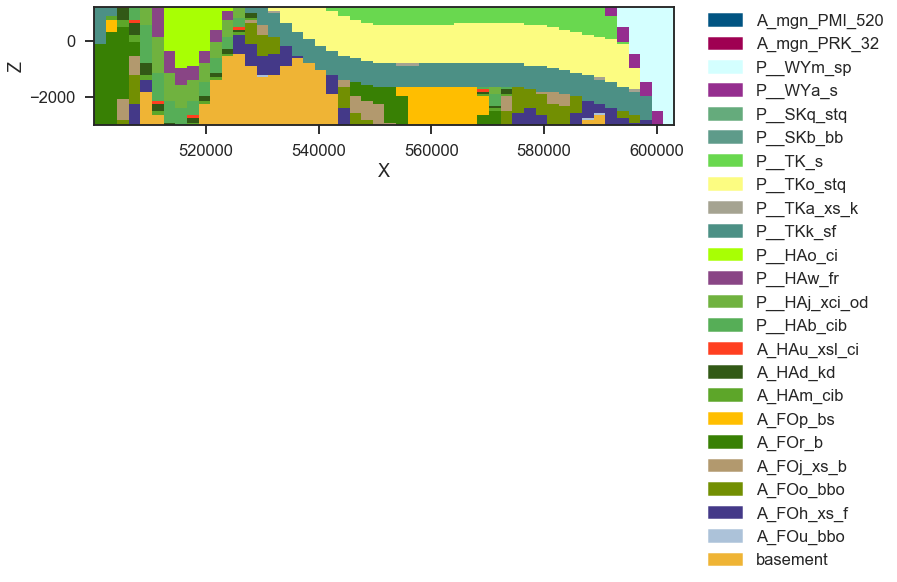

In [50]:
gp.plot.plot_section(geo_model, ve=5)

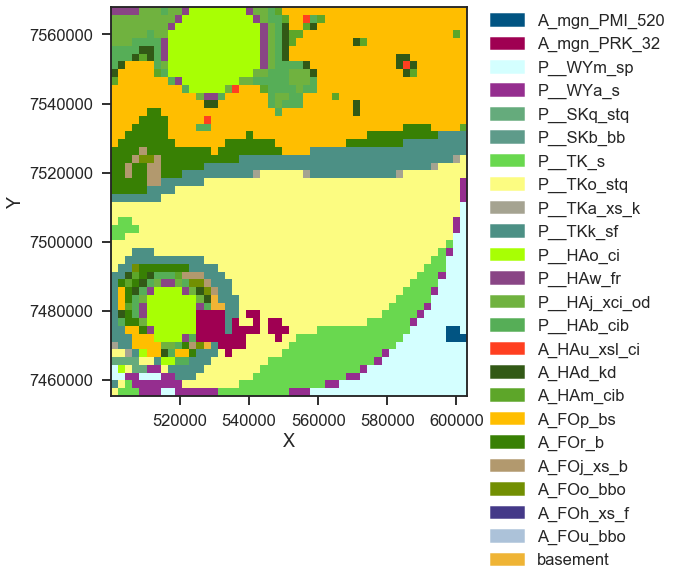

In [51]:
#gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)
gp.plot.plot_section(geo_model, 39, direction='z', show_data=False)

## Extract surfaces to visualize in 3D renderers

In [52]:
ver , sim = gp.get_surfaces(geo_model)

## Visualise model

In [54]:
gp.plot.plot_3D(geo_model,  render_data=False)

closing vtk


## Export model to vtk files

In [ ]:
from gempy import plot
gp.plot.export_to_vtk(geo_model, path='./test_data2/vtk/', name=mname+'.vtk', voxels=False, block=None, surfaces=True)